In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, FastICA

from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error 

from scipy.stats import kurtosis
from scipy.signal import butter, lfilter, filtfilt, freqz

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

In [8]:
# labels = [1]*100 + [2]*100 + [3]*100
# label_df = pd.DataFrame(labels, columns=['class'], index=df.index)
# label_df['class'] = label_df['class'].astype('category')
# label_df.to_csv('sig-label.csv')


## FUNCTIONS
- `def plot_pca_ica_sig(pca, ica, palette=pal):` plot the PCA and ICA components
- `def compute_eigens(data):` return eigenvalues and eigenvectors
- `def k_cpn_projection_on_data(eigenfunc, train, test, K=None):` return K component projection on train and test dataset, and the train mean (y_train, y_train_mean, y_test)
- `def compute_euclidean(y_test, mean):`return euclidean distance between K-component-projected test data and train mean
- `def compute_mahalanobis_distance(y_test, mean):` return mahalanobis distance between K-component-projected test data and train mean
- `def compute_euclidean_distance(y_test, mean):` return mahalanobis distance between K-component-projected test data and reconstructed test data in ICA part 2
- `def plotly_plot(del_y, K)`: plot the distance and its mean, Q1, STD values (using plotly hence the NAME), K is the number of components projected on data
- `def get_anomaly_samples(distance, threshold):` return Series of booleans  on rows to see which row (sample) is an anomaly
- `def plot_anomalies(y, dist, thres):`  plotting anomalies-- anomaly samples are indicated by dash lines. y = data (we use K-component-projection test data here), dist = distance, thres = threshold(which we define it ourselve)
- `def plot_confusion_mat(del_y, thres, labels):` confusion matrix plot of groud truth and prediction to see if how well classify data
- `def remove_n_cpn_projection_on_data(eigenfunc, train, test, N=0):`return y_train, y_train_mean, y_test -- the data which are first-principle-component reomoved
  

# HW 1: Separate 3 Mixed Signals
- https://github.com/akcarsten/Independent_Component_Analysis ***for more understanding***
- ICA: https://towardsdatascience.com/introduction-to-ica-independent-component-analysis-b2c3c4720cd9

In [3]:
dt = pd.read_csv('./Homework1_2.csv', header=None)
dt

0          1          2          3          4          5   \
0  26.457721   6.373042  24.406436 -21.420511 -46.703654   5.891017   
1  25.779513  16.231147  27.094654 -18.071918 -34.640614  13.241859   
2 -10.221810   1.482440  -8.163424  10.198639  23.175781   1.011951   

          6          7          8          9          10        11         12  \
0 -18.012103  56.829872 -21.871273  42.978627 -29.108275 -6.698777  32.272178   
1 -13.906859  61.356120 -19.921072  46.689437 -18.512865  3.745557  41.224511   
2   8.776835 -20.302510   8.843920 -15.738883  14.801548  6.234125  -9.103315   

          13        14        15         16         17         18         19  \
0 -18.662368 -2.061580 -2.299116   5.125023 -49.228321  55.760879  11.234361   
1  -7.164441  4.708875  5.857856  16.509455 -34.177493  63.534693  14.114177   
2  11.485449  3.426512  4.564833   3.016610  25.026624 -18.381178  -3.050334   

          20         21         22         23         24         25  \
0 -14.990338 -45.536815 -35.619598 -18.388911  27.280419  37.578996   
1  -7.641113 -35.477316 -23.056885 -20.171455  30.645110  34.744877   
2   8.325784  20.994984  17.924452   5.501897  -9.677506 -15.613799   

          26        27         28         29        30         31         32  \
0  15.458865 -2.007697 -35.156316 -23.760977  3.041349 -35.442231 -10.278091   
1  18.020072 -8.015254 -42.248829 -23.943860 -6.770960 -31.683030 -19.095058   
2  -4.747062 -1.183775  11.487246   9.633151 -4.651450  15.497974   0.444301   

          33         34        35         36         37         38         39  \
0  40.431621  16.406814  0.011699  29.720167 -40.324473 -37.652082 -11.544834   
1  31.560877  14.132623 -3.989430  25.580950 -47.008981 -41.926470 -22.912507   
2 -19.223810  -7.714209 -2.461812 -13.431951  12.445531  12.798419   0.200497   

         40         41         42         43         44         45         46  \
0  5.144532 -46.710109  34.194084 -42.444250  31.805484 -39.959518  20.032946   
1  4.459488 -43.472972  26.586578 -44.745418  19.574386 -43.483768   4.934159   
2 -1.629085  19.496966 -15.315728  15.808066 -17.035246  13.799230 -14.146379   

          47         48         49         50         51         52        53  \
0  41.021058  32.050171  26.592997 -10.433834  13.435092  52.523531 -3.874719   
1  38.547264  30.705422  20.930864 -23.065422  -0.191710  44.125284 -7.176445   
2 -17.418156 -13.235058 -12.832760  -1.250880 -10.731002 -23.037597  0.715574   

          54        55         56         57         58         59  
0 -12.330504  3.633880 -47.078784  36.485556  39.828980 -44.407339  
1 -22.848881  3.151831 -44.786313  36.383408  35.933678 -49.997388  
2   0.915156 -0.903180  19.424042 -14.003091 -16.826937  14.573394

### Standardisation conducted

In [4]:
scaled_dt = StandardScaler().fit_transform(dt.T)
scaled_dt.shape

(60, 3)

### Distribution plot of our dataset -- to check whether our data is guassian (normal)?

In [27]:

"""Interpretation of kurtosis values:
- A kurtosis value close to 0 suggests a distribution similar to a normal distribution.
- Positive kurtosis indicates heavy tails (more outliers) compared to a normal distribution.
- Negative kurtosis indicates lighter tails (fewer outliers) compared to a normal distribution
"""
kurtosis_value = kurtosis(dt.T)


array([-1.11192499, -0.95260101, -1.08114196])

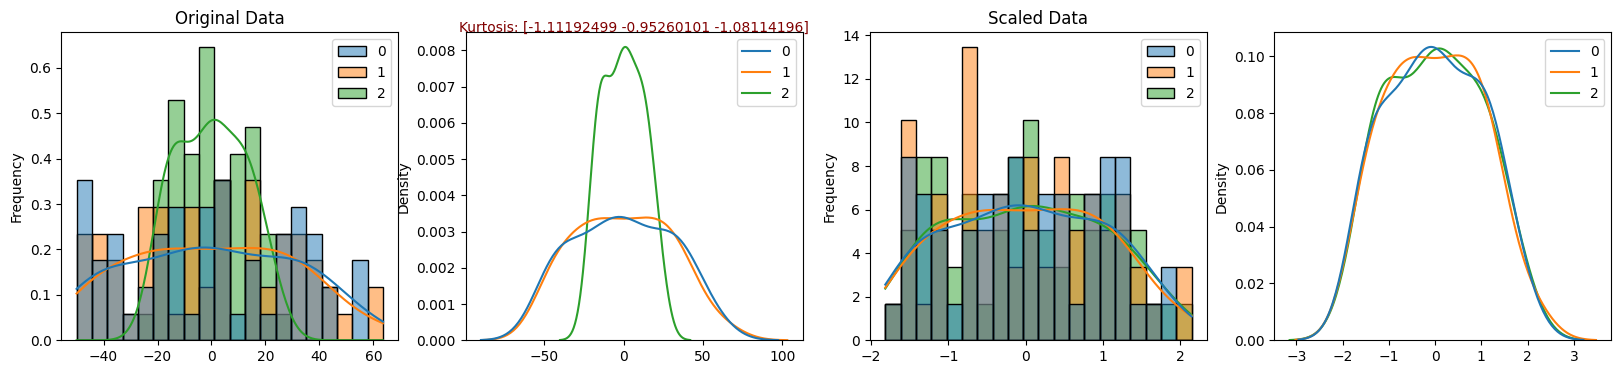

In [32]:
plt.figure(figsize=(20,4)).tight_layout()

sns.histplot(dt.T, stat='frequency', kde=True, bins=20, ax=plt.subplot(1,4,1))
plt.subplot(1,4,1).set_title('Original Data')

sns.kdeplot(dt.T, ax=plt.subplot(1,4,2))
plt.subplot(1,4,2).annotate(f'Kurtosis: {kurtosis_value}', xy=(0.5, 1), xycoords='axes fraction', ha='center', fontsize=10, color='maroon')


sns.histplot(scaled_dt, stat='frequency', kde=True, bins=20, ax=plt.subplot(1,4,3))
plt.subplot(1,4,3).set_title('Scaled Data')

sns.kdeplot(scaled_dt, ax=plt.subplot(1,4,4))

# dt.T.plot(kind='hist', bins=20, legend=False, title='Original', ax=plt.subplot(1,3,3))

plt.show()

### conducted PCA and ICA

In [58]:
pca_m =PCA(n_components=3,random_state=42)
pca_com = pca_m.fit_transform(dt.T)


In [59]:
ica_m = FastICA(n_components=3, random_state=42)
ica_com = ica_m.fit_transform(dt.T)

In [60]:
ica_com.shape , pca_com.shape

((60, 3), (60, 3))

In [61]:
pca_com.shape[1]

3

In [38]:
#PALETTE
pal=sns.crayon_palette(sns.crayons)[8:11]

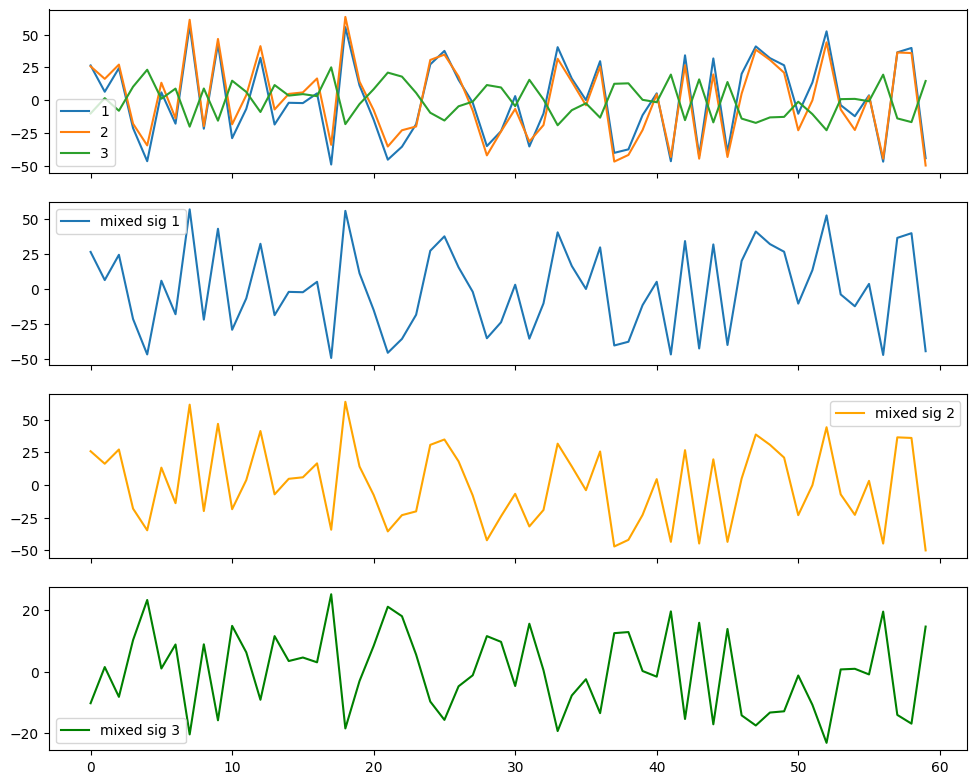

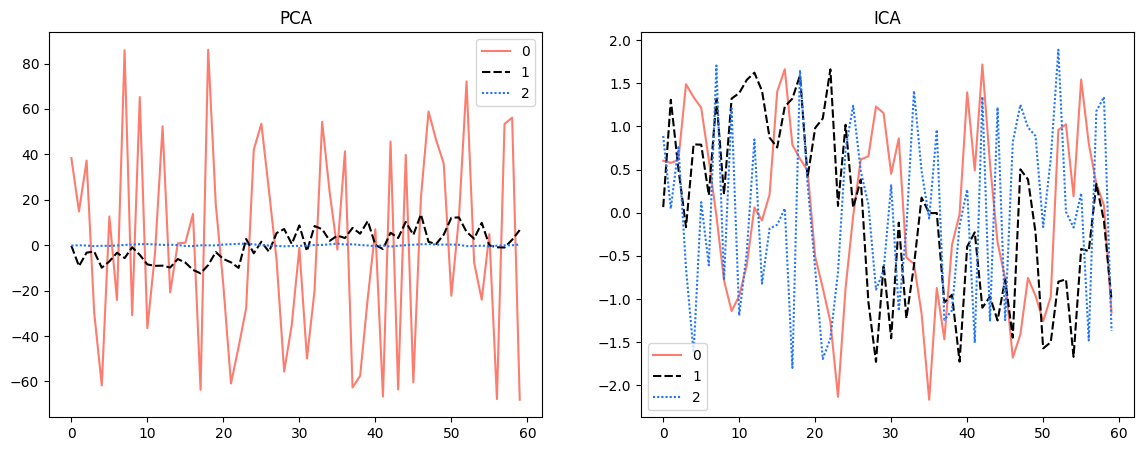

In [63]:
#ALL PLOTS COMBINED
fig, ax = plt.subplots(nrows=4,ncols=1, figsize=(10,8), sharex=True)
fig.tight_layout()
ax[0].plot(dt.T, label=(dt.index +1))
ax[0].legend()

ax[1].plot(dt.loc[0].T, label= 'mixed sig 1')
ax[2].plot(dt.loc[1].T, label= 'mixed sig 2', c='orange')
ax[3].plot(dt.loc[2].T, label= 'mixed sig 3', c='green')
ax[1].legend()
ax[2].legend()
ax[3].legend()

plt.show()

#ALL THREE TOGETHER 
plt.figure(figsize=(14,5)).tight_layout()
plt.subplot(1,2,1).set_title('PCA')
sns.lineplot(pca_com, ax=plt.subplot(1,2,1), palette=pal)

plt.subplot(1,2,2).set_title('ICA')
sns.lineplot(ica_com, ax=plt.subplot(1,2,2), palette=pal)
plt.show()

In [346]:
'''
sns.lineplot(pca_com[:,0], ax=ax[1][0])
sns.lineplot(pca_com[:,1], ax=ax[2][0])
sns.lineplot(pca_com[:,2], ax=ax[3][0])

sns.lineplot(ica_com[:,0], ax=ax[1][1])
sns.lineplot(ica_com[:,1], ax=ax[2][1])
sns.lineplot(ica_com[:,2], ax=ax[3][1])
'''
# def plot_trans_sig(com , col,ax, palette=pal):
#     for i in range(com.shape[1]):
#         sns.lineplot(com[:, i], color=pal[i], ax=ax[i][col], label=f'Component {i+1}')


'\nsns.lineplot(pca_com[:,0], ax=ax[1][0])\nsns.lineplot(pca_com[:,1], ax=ax[2][0])\nsns.lineplot(pca_com[:,2], ax=ax[3][0])\n\nsns.lineplot(ica_com[:,0], ax=ax[1][1])\nsns.lineplot(ica_com[:,1], ax=ax[2][1])\nsns.lineplot(ica_com[:,2], ax=ax[3][1])\n'

In [39]:
#RESULTS OF PCA AND ICA
def plot_pca_ica_sig(pca, ica, palette=pal):
    fig, ax = plt.subplots(3,2,sharex=True, figsize=(15,7))
    fig.tight_layout()
    ax[0][0].set_title('PCA TRANSFORMED')
    for i in range(pca.shape[1]):
        sns.lineplot(pca[:, i], color=pal[i], ax=ax[i][0], label=f'Component {i+1}')

    ax[0][1].set_title('ICA TRANSFORMED')
    for i in range(ica.shape[1]):
        sns.lineplot(ica[:, i], color=pal[i], ax=ax[i][1], label=f'Component {i+1}')

    [ax[i][j].grid() for i in range(ax.shape[0]) for j in range(ax.shape[1])]
    plt.show()


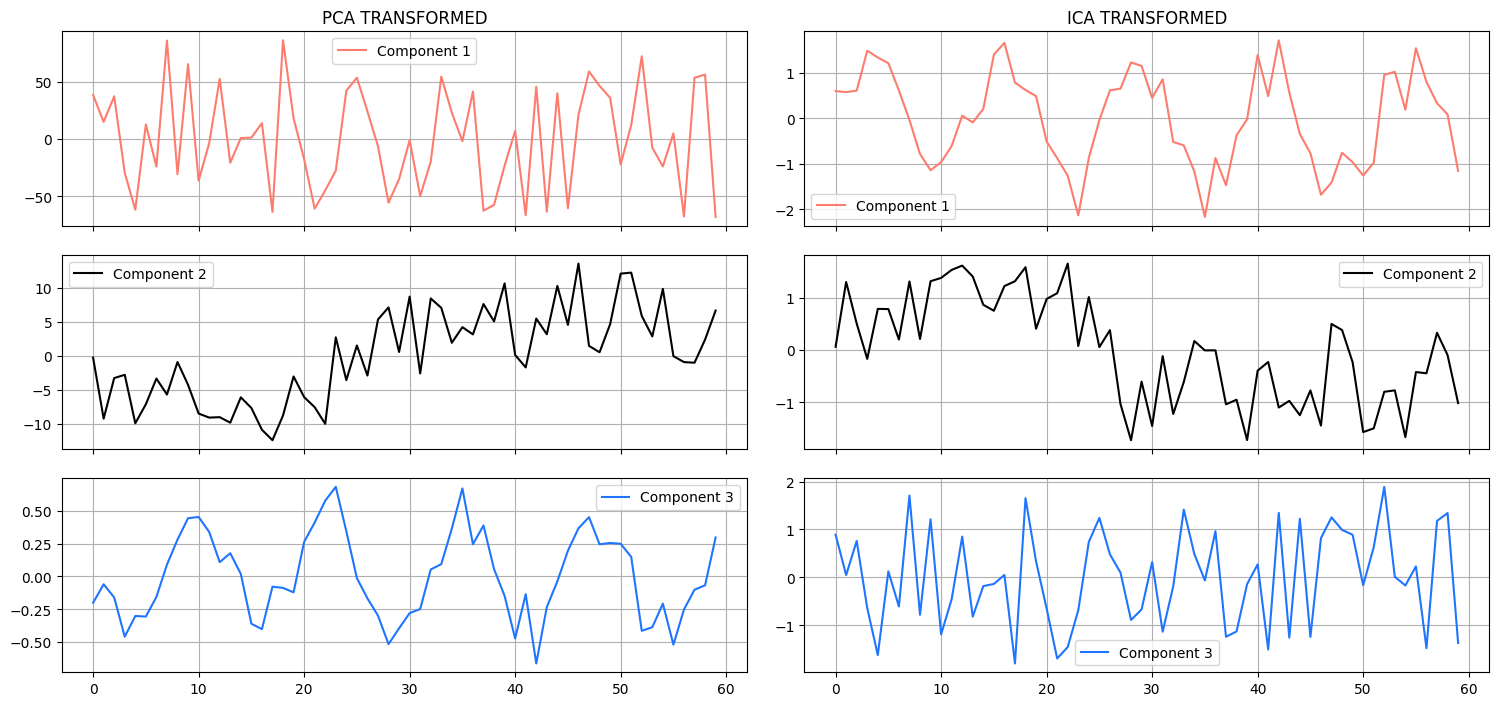

In [67]:
sns.crayon_palette(sns.crayons)

plot_pca_ica_sig(pca_com, ica_com)


# HW2 TASK 1: PCA -- Dimension reduction/ feature representation, and classification
-  1 - 100   Normal (class 1)
- 101-200  Cyclic (class 2)
- 201-300  Upward shift (class 3)

Now, we have 50 samples and 60 features on both training and test sets. => dimension = (50,60)

In [41]:
df = pd.read_csv('./Homework1_1.csv', header=None)
# class_df = pd.read_csv('./synth-sig-w-class.csv').drop(columns='Unnamed: 0')


In [42]:
train = df[:50] #first 50 of normal signal data as TRAINING
test = df[50:]# another rest of normal data -- 50 data as TEST SET 
print(train.shape, test.shape)

(50, 60) (250, 60)


## ANOMALY DETECTION
***for reference and more understanding*** : https://github.com/jeffprosise/Machine-Learning/blob/master/Anomaly%20Detection%20(PCA).ipynb 
- either follow this the code above or,
- follow your professor guide -- they both work the same way, just that your prof.'s way is to compute it by hand.



### PCA BY HAND

(60, 50)

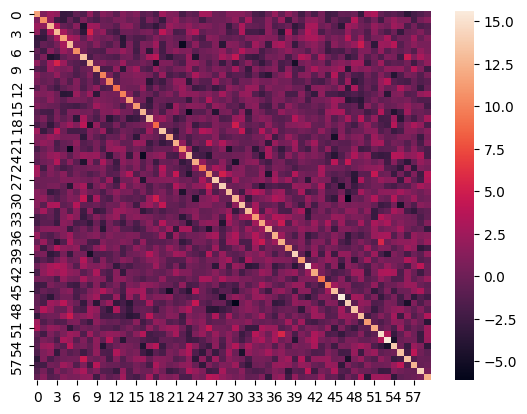

In [43]:
# sns.heatmap(np.cov(train.T))
sns.heatmap(train.cov())
train.T.shape

$y_x = E_{C} * x$

In [44]:
print(train.cov().shape)
def compute_eigens(data):
    eigenvalues, eigenvectors = np.linalg.eig(data.cov())
    #Get indices for sorting in descending order
    idx = eigenvalues.argsort()[::-1]
    #Sort the eigenvalues in descending order 
    eigenvalues = eigenvalues[idx]
    #Sort the corresponding eigenvectors accordingly
    eigenvectors = eigenvectors[:,idx]
    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = compute_eigens(train)

print(eigenvalues.shape, eigenvectors.real[:10,:10].shape)

(60, 60)
(60,) (10, 10)


#### compute distance look here: https://www.geeksforgeeks.org/how-to-calculate-mahalanobis-distance-in-python/

In [45]:
# K = 10 
def k_cpn_projection_on_data(eigenfunc, train, test, K=None):# FUNCTION FOR COMPUTING K COMPONENTS PROJECTION ONTO DATA
    eigenvals, eigenvectors = eigenfunc(train)
    if K==None:
        K=train.shape[1]
    y_train = eigenvectors.real[:K,:] @ train.T
    y_train_mean = np.mean(y_train, axis=1)
    y_test = eigenvectors.real[:K,:] @ test.T
    return y_train, y_train_mean, y_test

def euclidean_distance(y_test, mean):
    dist = np.sqrt(np.sum((y_test.T - mean)**2, axis=1))
    return dist
    
def compute_mahalanobis_distance(y_test, mean):
    cov = y_test.T.cov()
    centred_y_test = y_test.T - mean
    inv_cov = np.linalg.inv(cov)
    mdist =np.dot(np.dot(centred_y_test, inv_cov ), centred_y_test.T)
    return pd.Series(mdist.diagonal(), index=y_test.T.index)

In [46]:
# cen = y_test_10.T  - train_10_mean
# cov = y_test_10.T.cov()
# inv_cov = pd.DataFrame(np.linalg.inv(cov))
# print(cen.T.shape, cov.shape, inv_cov.shape, cen.shape)
# m =(np.dot(np.dot(cen, inv_cov ), cen.T))
# m.diagonal()


In [47]:
y_train_5, train_5_mean, y_test_5 = k_cpn_projection_on_data(compute_eigens, train, test, 5)
y_train_10,  train_10_mean, y_test_10 = k_cpn_projection_on_data(compute_eigens, train,test, 10)
y_train_30,  train_30_mean, y_test_30 = k_cpn_projection_on_data(compute_eigens, train,test, 30)
print(y_train_10.shape,  train_10_mean.shape, y_test_10.shape)


del_y_5 = compute_mahalanobis_distance(y_test_5, train_5_mean)
del_y_10 = compute_mahalanobis_distance(y_test_10, train_10_mean)
del_y_30 = compute_mahalanobis_distance(y_test_30, train_30_mean)

(10, 50) (10,) (10, 250)


In [48]:
def reconstruct_data(data, feat_vec):
    reconstructed = data @ feat_vec
    return reconstructed

In [156]:
def plotly_plot(del_y, K=None):
    if not K:
        title='The Error plot'
    else:
        title = f'distance of y_x and mean_vec when K = {K}'
        
    fig = px.line(del_y, title=title).add_hline( 
            y=np.mean(del_y), 
            line_color='black', 
            line_width=2, 
            line_dash ='dash',
            annotation_text = 'mean'
        ).add_hline( 
        y=np.quantile(del_y,0.25), 
        line_color='red', 
        line_width=2, 
        line_dash ='dash',
        annotation_text = 'Q1'
        ).add_hline( 
        y=np.std(del_y), 
        line_color='lime', 
        line_width=2, 
        line_dash ='dash',
        annotation_text = 'std'
       )
    return fig

    

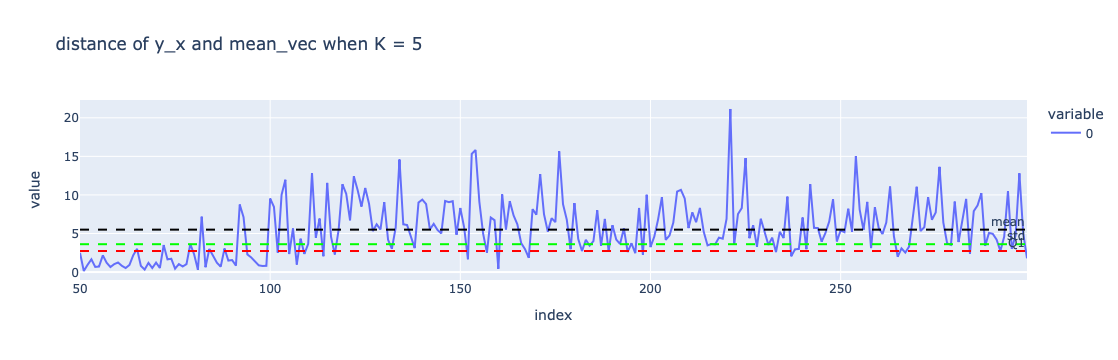

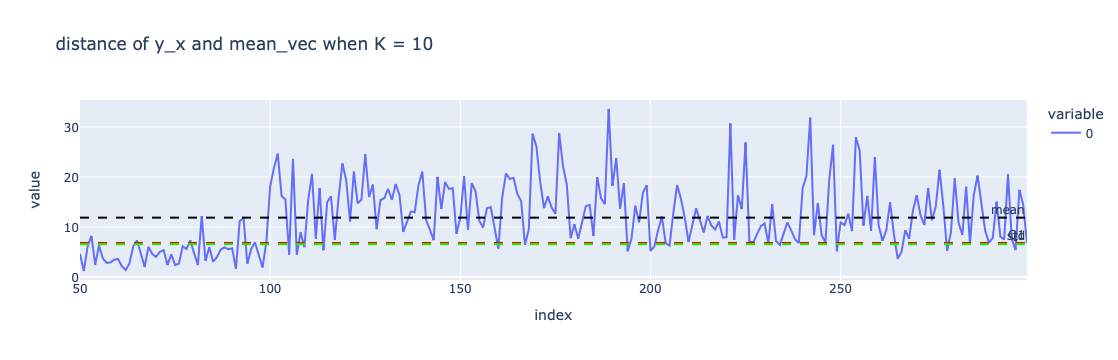

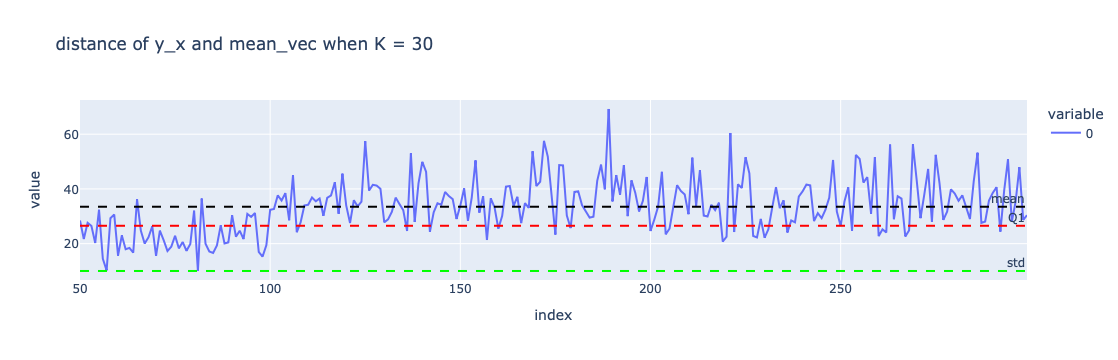

In [157]:
plotly_plot(del_y_5, 5).show()
plotly_plot(del_y_10,10).show()
plotly_plot(del_y_30,30).show()

### DEFINE THRESHOLD AND DETECT ANOMALIES

In [52]:
def get_anomaly_samples(distance, threshold):
    return pd.Series(distance > threshold)
    
def plot_anomalies(y, dist, thres):
    anomaly_row = pd.Series(dist > thres)
    
    y.T.plot(figsize=(12,5), title='Anomaly identifying')
    anomalies = y.T.loc[anomaly_row]
    print(f'anomaly sample:{anomalies.index}')
    
    for i in anomalies.index:
        plt.axvline(i, color='grey', ls='--', alpha=0.5)
    plt.legend().remove()
    plt.show()

anomaly sample:Index([ 79,  82,  92,  93, 100, 101, 103, 104, 106, 108,
       ...
       286, 287, 289, 290, 291, 293, 294, 296, 297, 298],
      dtype='int64', length=161)


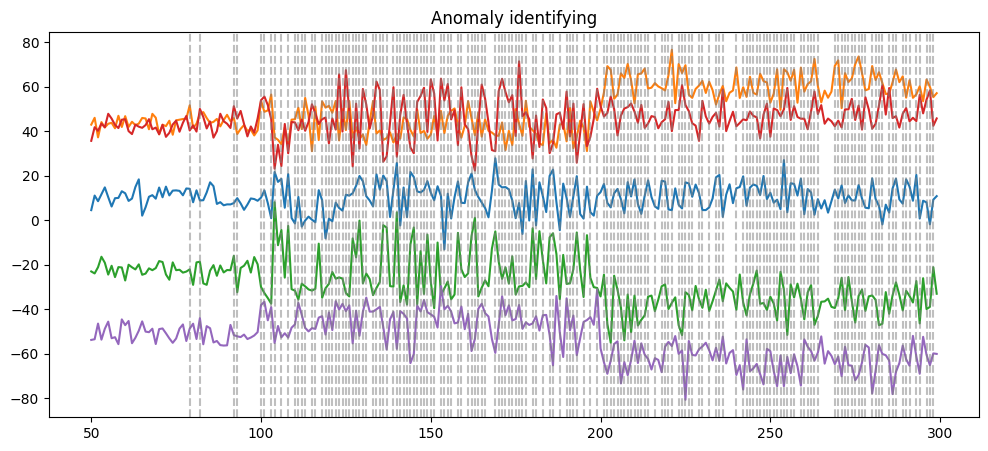

anomaly sample:Index([ 53,  65,  79,  82,  92,  93,  96,  99, 100, 101,
       ...
       288, 289, 290, 291, 292, 293, 294, 295, 297, 298],
      dtype='int64', length=187)


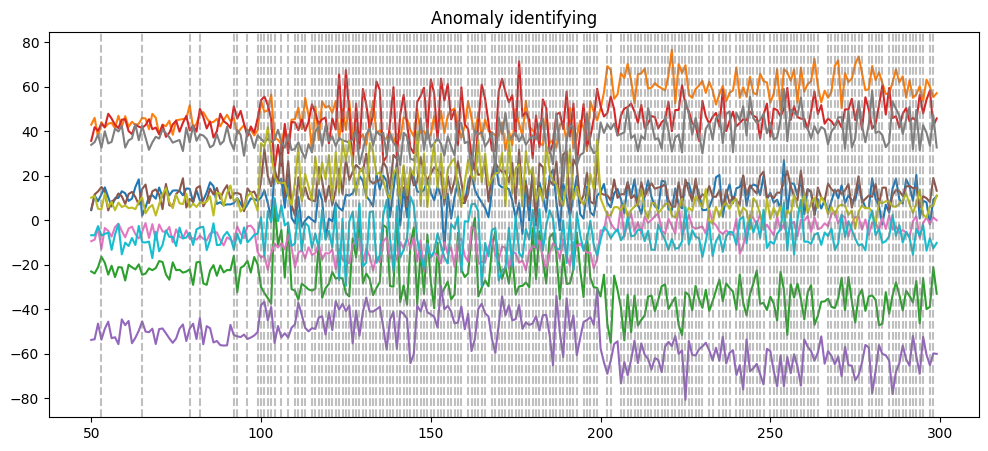

anomaly sample:Index([ 50,  52,  55,  58,  59,  65,  80,  82,  87,  90,
       ...
       289, 290, 291, 293, 294, 295, 296, 297, 298, 299],
      dtype='int64', length=187)


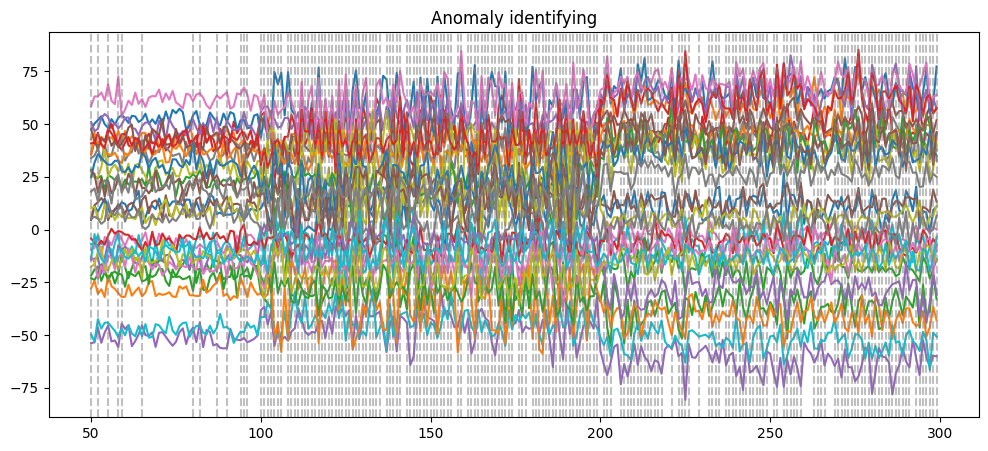

In [53]:
plot_anomalies(y_test_5, del_y_5, np.std(del_y_5))
plot_anomalies(y_test_10, del_y_10, np.quantile(del_y_10, 0.25))
plot_anomalies(y_test_30, del_y_30, np.quantile(del_y_30, 0.25))

In [54]:
new_labels = [False]*50 + [True]*200

In [55]:
def plot_confusion_mat(del_y, thres, labels):
    predict = get_anomaly_samples(del_y, thres)
    con = confusion_matrix(labels, predict, normalize='true')
    sns.heatmap(con, fmt='.2%',annot=True, cbar=False, xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
    plt.xlabel('Prediction')
    plt.ylabel('Ground Truth')
    plt.show()


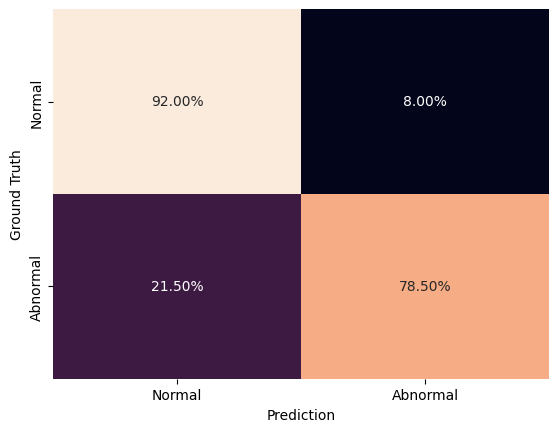

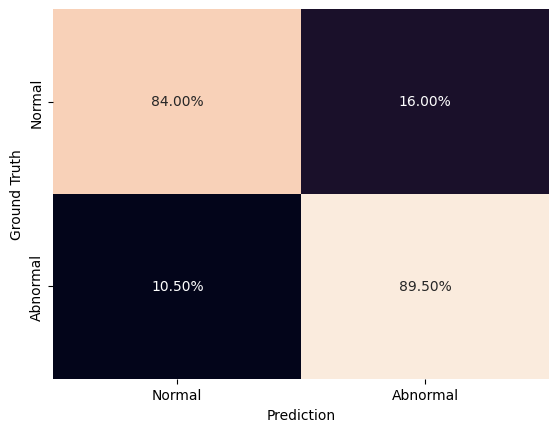

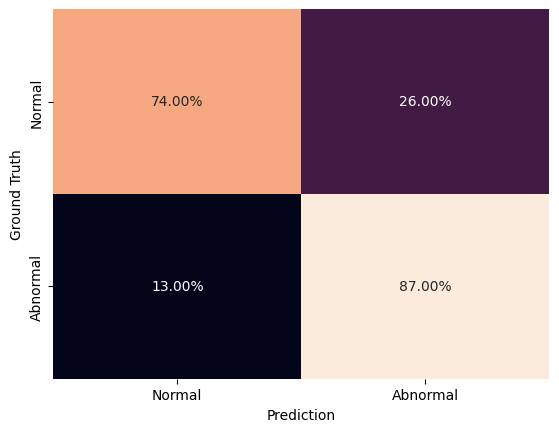

In [707]:
"""
By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.

Thus in binary classification, 
the count of true negatives is:math:`C_{0,0}`, 
false negatives is :math:`C_{1,0}`, 
true positives is:math:`C_{1,1}` and 
false positives is :math:`C_{0,1}`.
"""
# np.quantile(del_y_5, 0.25)
plot_confusion_mat(del_y_5, del_y_5.std(), new_labels) #use STD as a threshold
plot_confusion_mat(del_y_10, np.quantile(del_y_10, 0.25), new_labels)
plot_confusion_mat(del_y_30, np.quantile(del_y_30, 0.25), new_labels)



***HW instruction*** (compute by hand)
- let $y^-_normal$  be the mean vector of normal training samples. The anomaly is detected as follows:
Compute the distance for a test sample: 
- Compute the distance  delta $y_x = abs(y_x - y^-_normal)$ for a test sample x  


## A) Remove first component
*for more understanding:* https://machinelearningmastery.com/principal-component-analysis-for-visualization/
- X - 1st PC -- as thogh the first component as u know it captures the most variation of data, i.e. it contains the feature that hv the most info. about the data. Doing this to see and compare how the model will perform with and without it.
- X = training set

In [56]:
def remove_n_cpn_projection_on_data(eigenfunc, train, test, N=0):# FUNCTION FOR COMPUTING K COMPONENTS PROJECTION ONTO DATA
    _, eigenvectors = eigenfunc(train)
    y_train = eigenvectors.real[N:,:] @ train.T 
    y_train_mean = np.mean(y_train, axis=1)
    y_test = eigenvectors.real[N:,:] @ test.T 
    return y_train, y_train_mean, y_test
#------------------------------------------------------------------#   
y_removed, mean_removed_y, y_test_rm = remove_n_cpn_projection_on_data(compute_eigens,train,test,1 )

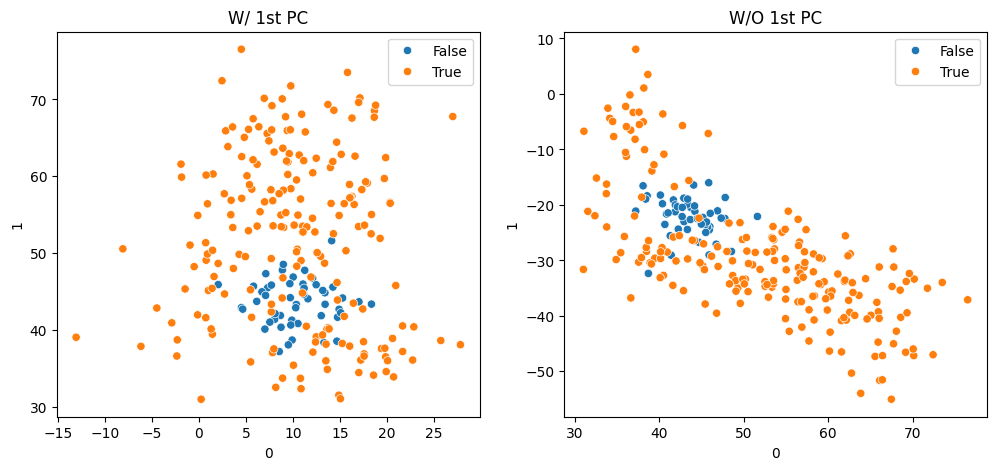

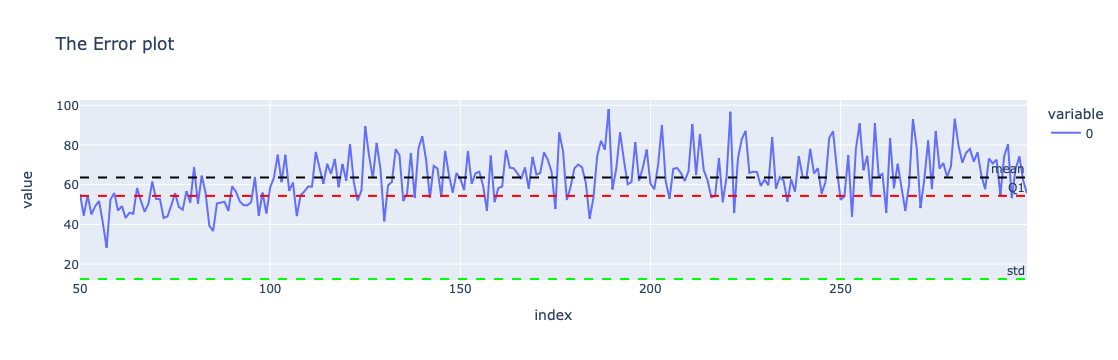

anomaly sample:Index([ 50,  52,  59,  65,  69,  75,  78,  80,  82,  83,
       ...
       289, 290, 291, 292, 293, 294, 296, 297, 298, 299],
      dtype='int64', length=187)


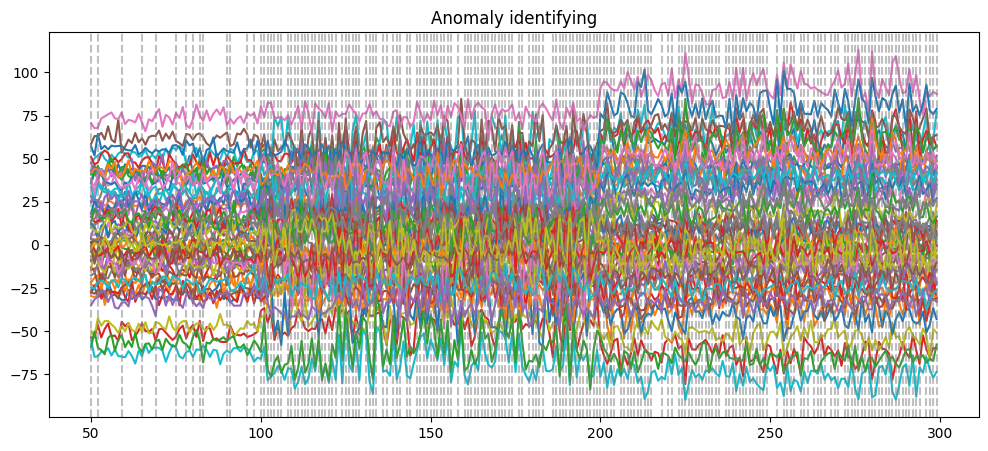

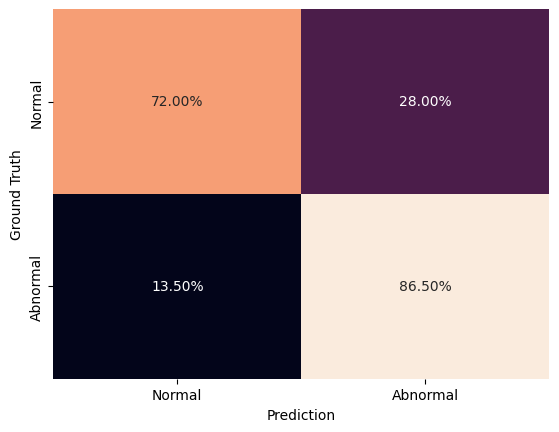

In [158]:
pca_train, mean_pca_train, pca_test = k_cpn_projection_on_data(compute_eigens, train, test)
del_y_removed = compute_mahalanobis_distance(y_test_rm, mean_removed_y)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1).set_title('W/ 1st PC')
sns.scatterplot(x=pca_test.T.iloc[:,0],y=pca_test.T.iloc[:, 1], data=pca_test.T, hue=new_labels, ax=plt.subplot(1,2,1))
plt.subplot(1,2,2).set_title('W/O 1st PC')
sns.scatterplot(x=y_test_rm.T.iloc[:,0],y=y_test_rm.T.iloc[:,1], data=y_test_rm.T, hue=new_labels, ax=plt.subplot(1,2,2))
plt.show()

pd.DataFrame(del_y_removed).T

plotly_plot(del_y_removed, None).show()
plot_anomalies(y_test_rm,del_y_removed, del_y_removed.quantile(0.25)) # Q1 OF DISTANCE AS A THRESHOLD
plot_confusion_mat(del_y_removed, del_y_removed.quantile(0.25), new_labels)
# 

## B) DATA NORMALISATION

In [57]:
standardised_data = pd.DataFrame(StandardScaler().fit_transform(df))
scaled_train = standardised_data[:50]
scaled_test = standardised_data[50:]
print(scaled_train.shape, scaled_test.shape)

(50, 60) (250, 60)


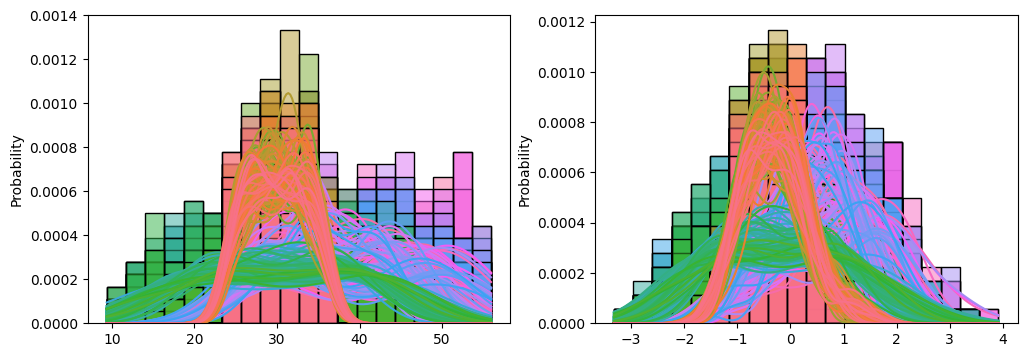

In [44]:
plt.figure(figsize=(12,4))
sns.histplot(df.T, bins=20, ax=plt.subplot(1,2,1), kde=True, legend=False, stat='probability')
sns.histplot(standardised_data.T, bins=20, ax=plt.subplot(1,2,2), kde=True, legend=False,stat='probability' )
# df.plot(kind='hist',bins=20, ax=plt.subplot(1,2,1), title='original').legend().remove()
# standardised_data.plot(kind='hist', bins=20, ax=plt.subplot(1,2,2), title='Normalised').legend().remove()
plt.show()

In [160]:
scaled_y_train_5, scaled_train_5_mean, scaled_y_test_5 = k_cpn_projection_on_data(compute_eigens, scaled_train, scaled_test, 5)
scaled_y_train_10,  scaled_train_10_mean, scaled_y_test_10 = k_cpn_projection_on_data(compute_eigens, scaled_train, scaled_test, 10)
scaled_y_train_30,  scaled_train_30_mean, scaled_y_test_30 = k_cpn_projection_on_data(compute_eigens, scaled_train, scaled_test, 30)
print(scaled_y_train_10.shape,  scaled_train_10_mean.shape, scaled_y_test_10.shape)

del_scaled_y_5 = compute_mahalanobis_distance(scaled_y_test_5, scaled_train_5_mean)
del_scaled_y_10 = compute_mahalanobis_distance(scaled_y_test_10, scaled_train_10_mean)
del_scaled_y_30 = compute_mahalanobis_distance(scaled_y_test_30, scaled_train_30_mean)

scaled_y_train, scaled_train_mean, scaled_y_test = k_cpn_projection_on_data(compute_eigens, scaled_train,  scaled_test,)
del_scaled_y = compute_mahalanobis_distance(scaled_y_test, scaled_train_mean)

(10, 50) (10,) (10, 250)


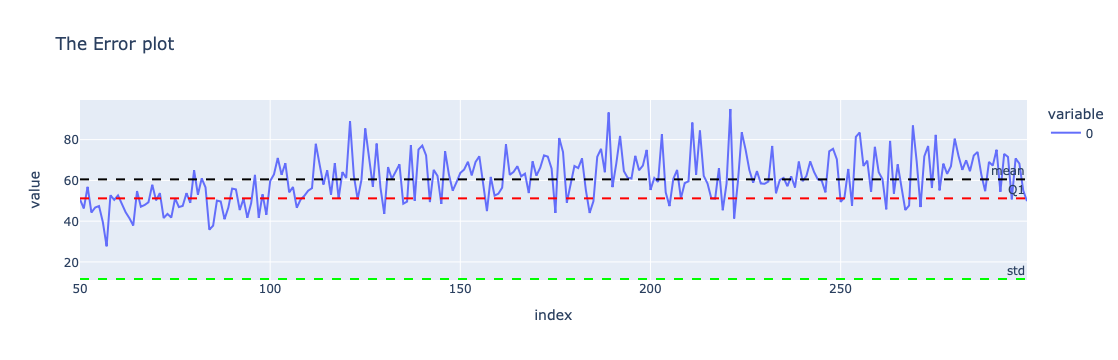

In [161]:
plotly_plot(del_scaled_y, None).show()

anomaly sample:Index([ 80,  82,  96, 101, 102, 103, 104, 112, 113, 115,
       ...
       285, 286, 287, 289, 290, 291, 293, 294, 296, 297],
      dtype='int64', length=124)


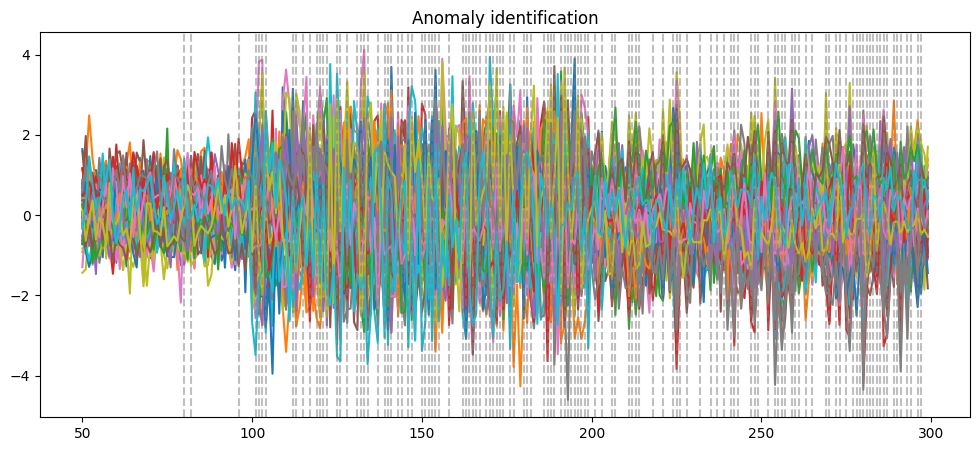

In [47]:
th = del_scaled_y.mean() #Threshold

plot_anomalies(scaled_y_test, del_scaled_y,th ) ## threshold here is mean of distance

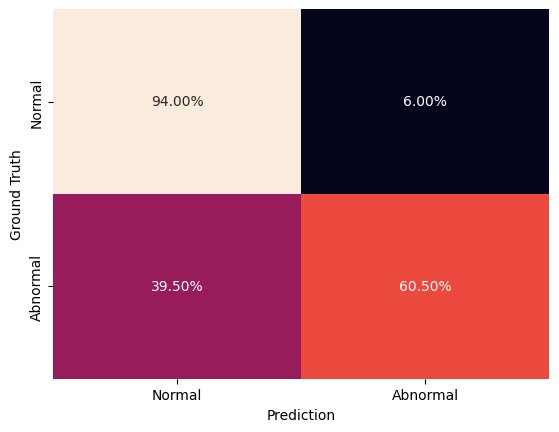

In [48]:
plot_confusion_mat(del_scaled_y, th, new_labels) #Q1 of distance as a threshold

## C) SMOOTHING:
For the signal separation task, apply smoothing (e.g. moving average or low-pass filtering) to reduce of noise in the time-series data, and observe the separated signals with PCA, and the anomaly detection result.

- https://learnpython.com/blog/python-moving-average/
- https://www.geeksforgeeks.org/how-to-calculate-moving-average-in-a-pandas-dataframe/
- https://www.linkedin.com/pulse/mastering-low-pass-high-pass-filters-image-processing-allan-cruz-2nlzf
- https://stackoverflow.com/questions/25191620/creating-lowpass-filter-in-scipy-understanding-methods-and-units

## SIGNAL SEPARATION TASK
- #### MOVING AVERAGE

In [34]:
dt

0          1          2          3          4          5   \
0  26.457721   6.373042  24.406436 -21.420511 -46.703654   5.891017   
1  25.779513  16.231147  27.094654 -18.071918 -34.640614  13.241859   
2 -10.221810   1.482440  -8.163424  10.198639  23.175781   1.011951   

          6          7          8          9          10        11         12  \
0 -18.012103  56.829872 -21.871273  42.978627 -29.108275 -6.698777  32.272178   
1 -13.906859  61.356120 -19.921072  46.689437 -18.512865  3.745557  41.224511   
2   8.776835 -20.302510   8.843920 -15.738883  14.801548  6.234125  -9.103315   

          13        14        15         16         17         18         19  \
0 -18.662368 -2.061580 -2.299116   5.125023 -49.228321  55.760879  11.234361   
1  -7.164441  4.708875  5.857856  16.509455 -34.177493  63.534693  14.114177   
2  11.485449  3.426512  4.564833   3.016610  25.026624 -18.381178  -3.050334   

          20         21         22         23         24         25  \
0 -14.990338 -45.536815 -35.619598 -18.388911  27.280419  37.578996   
1  -7.641113 -35.477316 -23.056885 -20.171455  30.645110  34.744877   
2   8.325784  20.994984  17.924452   5.501897  -9.677506 -15.613799   

          26        27         28         29        30         31         32  \
0  15.458865 -2.007697 -35.156316 -23.760977  3.041349 -35.442231 -10.278091   
1  18.020072 -8.015254 -42.248829 -23.943860 -6.770960 -31.683030 -19.095058   
2  -4.747062 -1.183775  11.487246   9.633151 -4.651450  15.497974   0.444301   

          33         34        35         36         37         38         39  \
0  40.431621  16.406814  0.011699  29.720167 -40.324473 -37.652082 -11.544834   
1  31.560877  14.132623 -3.989430  25.580950 -47.008981 -41.926470 -22.912507   
2 -19.223810  -7.714209 -2.461812 -13.431951  12.445531  12.798419   0.200497   

         40         41         42         43         44         45         46  \
0  5.144532 -46.710109  34.194084 -42.444250  31.805484 -39.959518  20.032946   
1  4.459488 -43.472972  26.586578 -44.745418  19.574386 -43.483768   4.934159   
2 -1.629085  19.496966 -15.315728  15.808066 -17.035246  13.799230 -14.146379   

          47         48         49         50         51         52        53  \
0  41.021058  32.050171  26.592997 -10.433834  13.435092  52.523531 -3.874719   
1  38.547264  30.705422  20.930864 -23.065422  -0.191710  44.125284 -7.176445   
2 -17.418156 -13.235058 -12.832760  -1.250880 -10.731002 -23.037597  0.715574   

          54        55         56         57         58         59  
0 -12.330504  3.633880 -47.078784  36.485556  39.828980 -44.407339  
1 -22.848881  3.151831 -44.786313  36.383408  35.933678 -49.997388  
2   0.915156 -0.903180  19.424042 -14.003091 -16.826937  14.573394

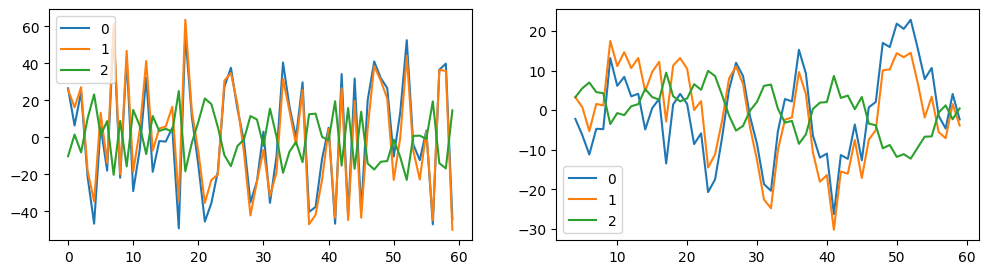

In [62]:
dt.T.plot(ax = plt.subplot(1,2,1), figsize=(12,3))
mv_avg_dt  = dt.T.rolling(5).mean().dropna()
mv_avg_dt.plot(ax=plt.subplot(1,2,2)).legend()

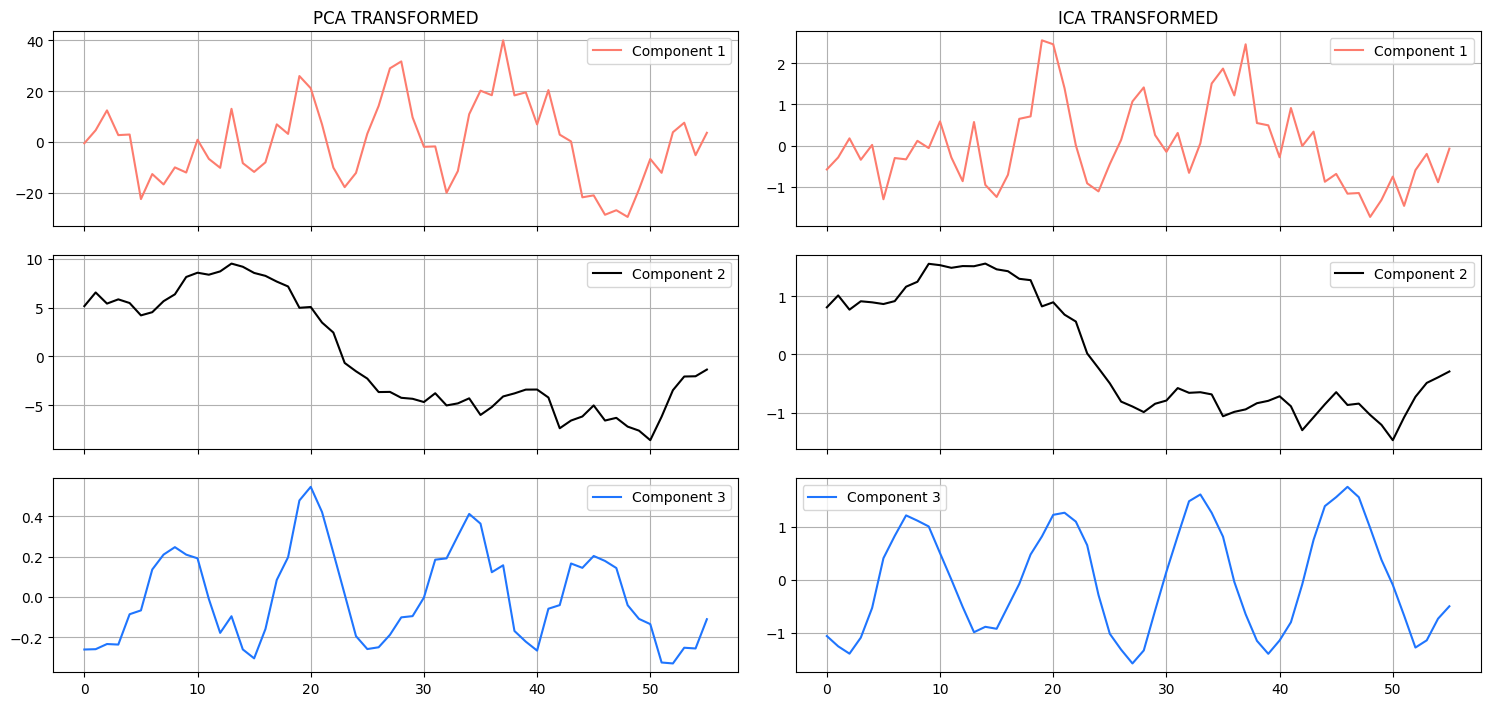

In [66]:
ma_pca = PCA(n_components=3, random_state=42).fit_transform(mv_avg_dt)
ma_ica = FastICA(n_components=3, random_state=42).fit_transform(mv_avg_dt)

plot_pca_ica_sig(ma_pca, ma_ica)

#### Applied LOW-PASS FILTERING

<Axes: >

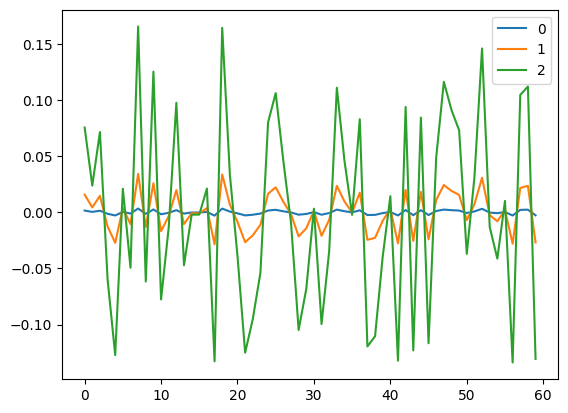

In [65]:
b, a =  butter(5, 0.1)
low_filtered = lfilter(b, a, dt.T)
low_filtered_dt = pd.DataFrame(low_filtered)
low_filtered_dt.plot()


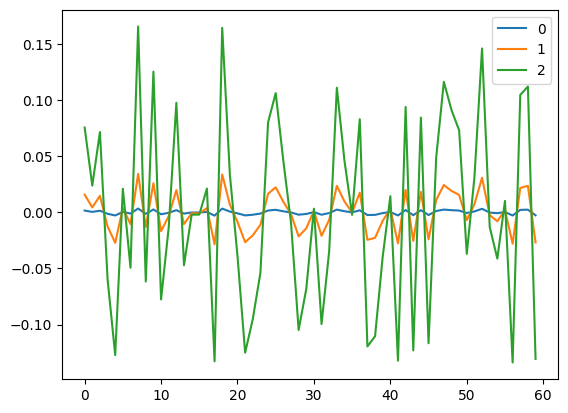

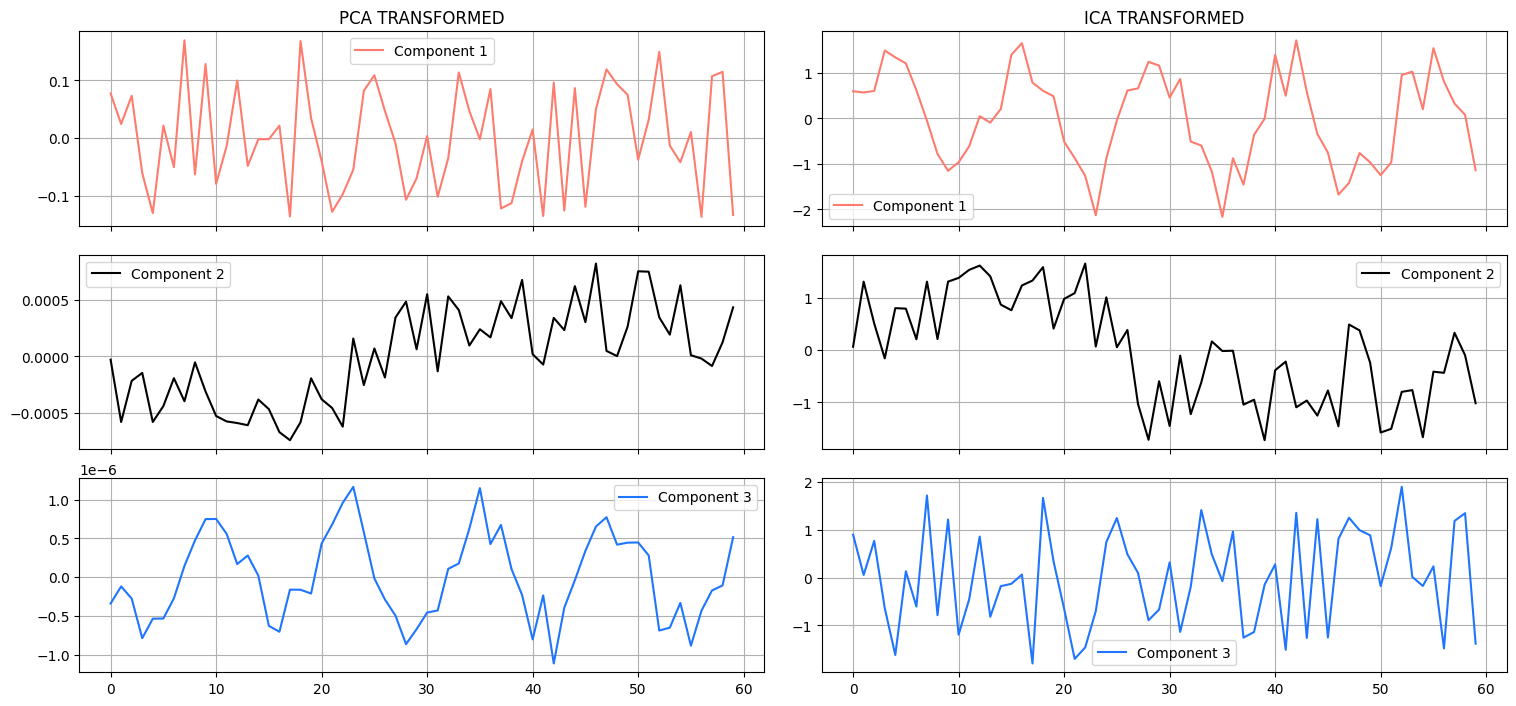

In [72]:
pca_lf =  PCA(n_components=3, random_state=42).fit_transform(low_filtered_dt)
ica_lf = FastICA(n_components=3, random_state=42).fit_transform(low_filtered_dt)

plot_pca_ica_sig(pca_lf, ica_lf)

### Anmaly detection

0          1          2          3          4          5   \
50   24.119025  27.006349  27.833104  27.742674  28.738364  30.211169   
51   24.966332  32.767872  33.738107  29.522008  26.175169  26.087317   
52   25.118456  28.657596  30.824002  30.309935  28.255998  28.016642   
53   31.394007  30.456239  29.154269  27.691976  27.226956  28.503316   
54   26.026494  28.563295  31.865160  33.050004  31.181020  30.453878   
..         ...        ...        ...        ...        ...        ...   
295  30.200733  28.129127  27.048522  27.113621  27.819188  28.987883   
296  27.342502  25.741576  25.602498  26.404671  27.167839  28.286947   
297  35.910840  32.554128  31.216516  30.124560  27.631623  26.052419   
298  34.697266  29.610979  28.298274  29.149713  28.581914  27.074206   
299  28.486303  30.853584  32.500248  33.751086  34.432318  33.084161   

            6          7          8          9          10         11  \
50   30.142505  28.454337  27.305988  28.285167  30.330854  31.305488   
51   27.506956  28.307866  28.040238  28.164550  29.673133  30.528762   
52   30.792436  33.632511  32.931878  28.989099  26.183027  27.671564   
53   30.231121  30.646127  30.180191  30.338412  30.842399  30.613872   
54   32.760016  33.549074  29.962279  26.746207  28.939866  33.785865   
..         ...        ...        ...        ...        ...        ...   
295  30.790962  32.502694  32.584762  30.884224  29.332278  29.306908   
296  30.474400  33.092943  34.436577  33.347169  30.584147  28.482874   
297  27.886103  31.445295  33.374429  33.125101  32.289166  31.239369   
298  27.824636  30.704642  31.899834  30.143871  28.942561  30.545640   
299  29.621340  27.171933  28.441519  31.071852  30.499033  27.427780   

            12         13         14         15         16         17  \
50   31.170063  31.561587  32.387081  31.916045  30.331903  29.714740   
51   28.931080  27.353797  28.264428  29.378564  28.553077  28.290643   
52   30.999862  31.717144  29.630580  27.661161  26.981904  27.161663   
53   30.548740  32.150988  34.126407  33.571471  30.361392  27.521220   
54   35.218895  33.107955  32.416687  34.300236  34.313641  30.855231   
..         ...        ...        ...        ...        ...        ...   
295  30.074377  30.941518  32.022902  31.908081  28.991761  25.842802   
296  28.722456  30.612760  32.214999  32.869757  33.273321  33.088022   
297  29.528920  28.812543  31.159230  34.102164  32.703918  27.750333   
298  32.217696  31.728707  31.707363  34.061780  35.092581  31.644944   
299  27.459851  32.190348  36.021057  34.091549  28.968206  26.663500   

            18         19         20         21         22         23  \
50   30.371618  30.421273  29.047307  27.586927  27.231738  27.307903   
51   30.424476  32.208391  31.653662  30.859208  31.348115  31.438491   
52   28.244070  29.677183  30.089350  29.895678  31.142855  33.558018   
53   27.231949  28.971011  31.364895  32.984043  31.858446  28.104658   
54   28.603260  30.063816  30.837434  28.024746  25.930531  28.223989   
..         ...        ...        ...        ...        ...        ...   
295  26.695347  30.342433  31.638773  29.877403  29.384344  31.775727   
296  31.210387  29.027733  29.501828  32.021685  32.635282  30.318516   
297  25.737723  29.258372  33.838816  35.347423  34.186187  31.894964   
298  27.160224  26.040222  27.216575  28.298043  30.408639  34.445547   
299  28.868452  31.825087  31.753876  29.331681  28.202213  29.775002   

            24         25         26         27         28         29  \
50   26.753139  26.638708  28.902361  32.179280  32.493451  29.284438   
51   29.861169  27.785607  26.530034  26.226396  26.840568  28.366840   
52   33.832965  30.732263  28.058449  29.153920  31.067683  29.408875   
53   26.131487  29.195415  33.294994  32.627942  28.933088  28.300516   
54   31.712566  32.675603  32.447763  32.827572  32.526363  31.275058   
..         ...        ...        ...        ...        ...        

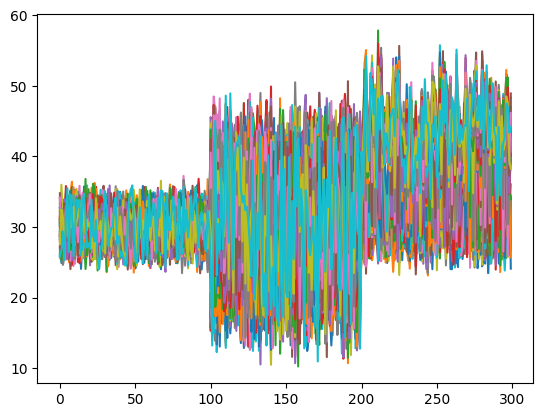

In [67]:
b1, a1 =  butter(5, 0.5)
low_filt = filtfilt(b1, a1, df)
low_filt_df = pd.DataFrame(low_filt)
low_filt_df.plot().legend().remove()

lf_train = low_filt_df[:50]
lf_test = low_filt_df[50:]
lf_test

(5, 50) (5, 250)


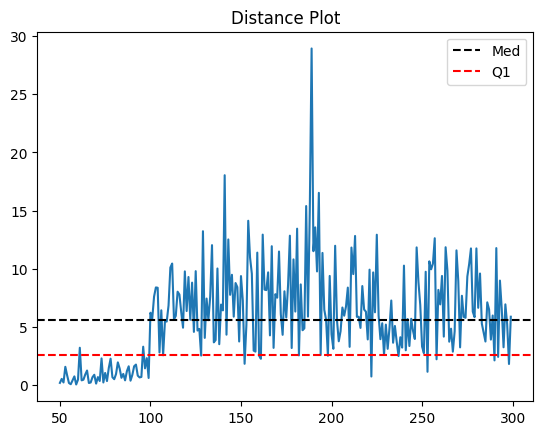

anomaly sample:Index([ 61,  96, 100, 101, 102, 103, 104, 105, 106, 108,
       ...
       287, 288, 289, 291, 293, 294, 295, 296, 297, 299],
      dtype='int64', length=187)


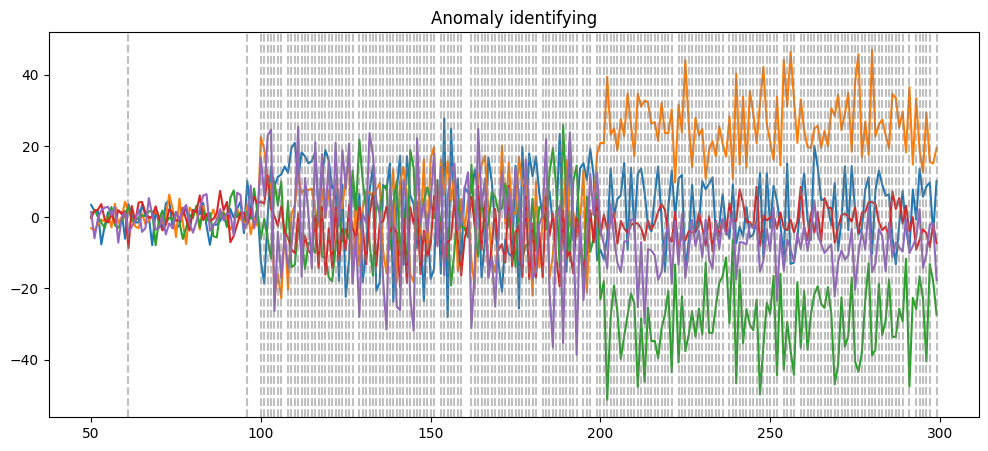

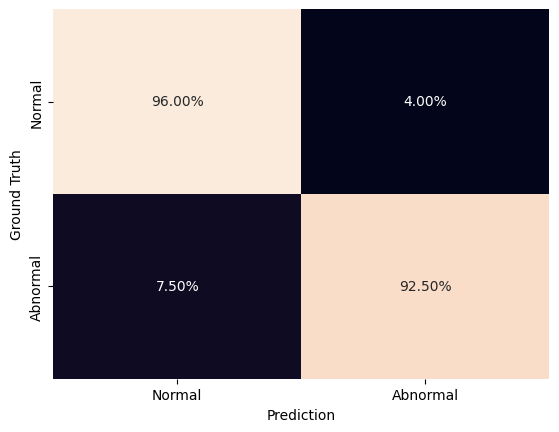

In [68]:
pca_3 = PCA(n_components=5, random_state=42)
pca_filt_train = pd.DataFrame(pca_3.fit_transform(lf_train), index=lf_train.index)
pca_filt_test = pd.DataFrame(pca_3.transform(lf_test), index=lf_test.index)
print(pca_filt_train.T.shape, pca_filt_test.T.shape)

distance_lf = compute_mahalanobis_distance(pca_filt_test.T, pca_filt_train.mean())
plot = distance_lf.plot(title = 'Distance Plot')
plot.axhline(distance_lf.median(), c='black',ls='--',label='Med' )
plot.axhline(distance_lf.quantile(0.25), c='r',ls='--', label='Q1')
plt.legend()
plt.show()

plot_anomalies(pca_filt_test.T, distance_lf, distance_lf.quantile(0.25)) # Q1 OF DISTACNE_LF AS A THRESHOLD

plot_confusion_mat(distance_lf, distance_lf.quantile(0.25), new_labels)

# PART 2: ICA

## Training data matrix **X**
- **U** - ICA output -- estimated source mat
- **W** - demixing mat
- **B** - feature mat -- $W^{-1}$
- **b_test** - test feat mat

ICA: whiten_solver:

    - "svd" is more stable numerically if the problem is degenerate, and
      often faster when `n_samples <= n_features`.

    - "eigh" is generally more memory efficient when
      `n_samples >= n_features`, and can be faster when
      `n_samples >= 50 * n_features`.


In [100]:
normal_signals = df[:100]
X = normal_signals.sample(10, replace=False, random_state=1000)

In [101]:
ica_p2 = FastICA(random_state=42, whiten_solver='eigh')
ica_p2.fit(X.T)

/Users/GPalita/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.



FastICA(random_state=42, whiten_solver='eigh')

### create another set of labels for dataset
test dataset has total of 290 samples -- the rest of 90 normal signals, 100 of cyc, and 100 of upward

In [102]:
def labels(num_of_train_samples):
    labels = [0]*(100-num_of_train_samples) + [1]*200
    return labels


In [103]:
test_labels = labels(10)

In [104]:
X_test = df.drop(X.index)
W = ica_p2.components_
U = W @ X

U_pinv = np.linalg.pinv(U)
print(X.shape, W.shape,  X_test.shape, U.shape, U.T.shape, U_pinv.shape )

b_test = X_test @ U_pinv
print(b_test.shape) 


(10, 60) (10, 10) (290, 60) (10, 60) (60, 10) (60, 10)
(290, 10)


In [105]:
X_hat = np.dot(b_test, U)
X_hat = pd.DataFrame(X_hat, index=X_test.index)

In [106]:
def compute_euclidean_distance(y, y_hat):
    distance = np.sqrt(np.sum((y - y_hat)**2, axis=1))
    return distance

In [107]:
errors = compute_euclidean_distance(X_test, X_hat)
errors.shape

(290,)

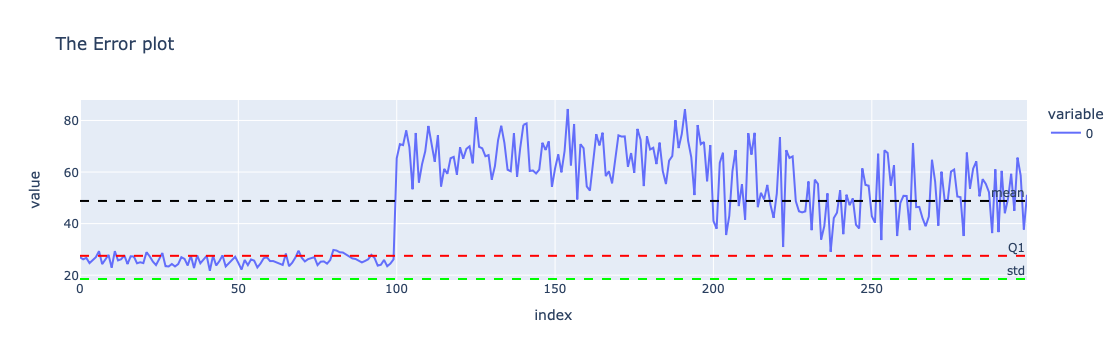

In [162]:
plotly_plot(errors).show()

#### By inspect from the graph above, will set a threshold = 40

anomaly sample:Index([100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       ...
       287, 289, 291, 292, 293, 294, 295, 296, 297, 299],
      dtype='int64', length=181)


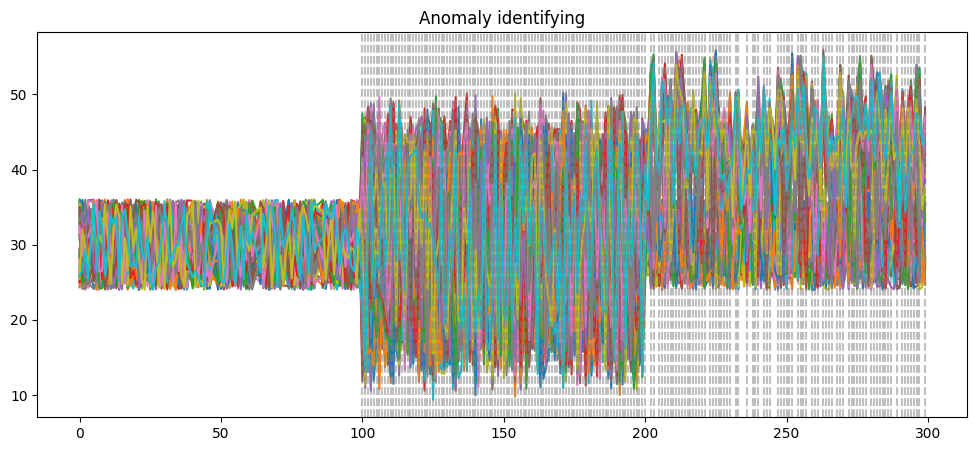

In [109]:
plot_anomalies(X_test.T, errors, 40)

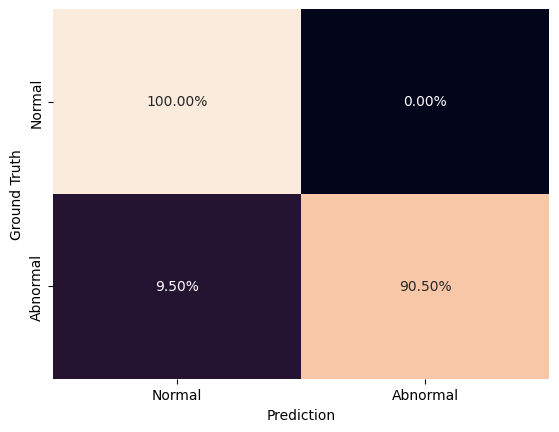

In [110]:
plot_confusion_mat(errors, 40, test_labels)

In [83]:
B =ica_p2.mixing_
pd.DataFrame(B)

0         1         2         3         4         5         6  \
0 -0.478235 -0.871025 -0.380388  1.851387 -1.557374  0.090410 -1.401771   
1 -1.309661 -1.165610  1.363672  1.233568  1.760752 -0.986738  0.001595   
2  0.011069 -0.294232  0.795659 -0.326047 -1.108225 -0.238749 -0.399029   
3  1.017969  0.383118  1.571920  1.279041 -0.479065  1.684349  0.674196   
4 -0.822111  1.539220  0.478036  0.590487  0.991844 -0.925000 -1.550463   
5 -0.763119 -0.335564 -0.385870  0.191415 -0.523349  1.852467 -0.478901   
6 -1.661434  1.528545  0.565952 -0.153010 -0.894417  0.551227 -0.269648   
7 -1.664191 -1.108942  0.910642 -1.266109 -0.386528 -0.623542 -0.367057   
8 -0.481559 -0.144458 -1.386713  0.915566  0.893126  1.823341  0.757949   
9  1.216560  0.576697  0.791552 -0.847261  1.582811  2.201770 -1.200895   

          7         8         9  
0  0.339049  1.449629 -1.352903  
1  0.781672 -1.061921 -0.768588  
2  1.225188 -1.067551  2.571005  
3 -1.216616  1.085941 -0.027121  
4 -0.770226  0.348024  1.215237  
5 -1.194521 -1.819137 -0.672699  
6  1.517147 -0.427399 -0.972640  
7 -1.223193  1.015855  0.156299  
8  0.561149  1.004880  1.366950  
9  1.241050  0.551831 -0.435339

### Increasing number of train samples: 65

In [178]:
X_65 = normal_signals.sample(65, replace=False, random_state=1000)
X_test_65 = df.drop(X_65.index)
X_65.shape, X_65.T.shape, X_test_65.shape, X_test_65.T.shape

((65, 60), (60, 65), (235, 60), (60, 235))

In [190]:
labels_65 = labels(65)

In [170]:
ica_65 = FastICA(whiten_solver='svd', random_state=42)
ica_65.fit(X_65.T)

FastICA(random_state=42)

In [184]:
W_65 = ica_65.components_
U_65 = W_65 @ X_65

U_pinv_65 = np.linalg.pinv(U_65)
print(W_65.shape, U_65.shape, U_65.T.shape, U_pinv_65.shape )

b_test_65 = X_test_65 @ U_pinv_65
print(b_test_65.shape) 

(60, 65) (60, 60) (60, 60) (60, 60)
(235, 60)


In [185]:
X_hat_65 = np.dot(b_test_65, U_65)
X_hat_65 = pd.DataFrame(X_hat_65, index=X_test_65.index)

In [186]:
errors_65 = compute_euclidean_distance(X_test_65, X_hat_65)

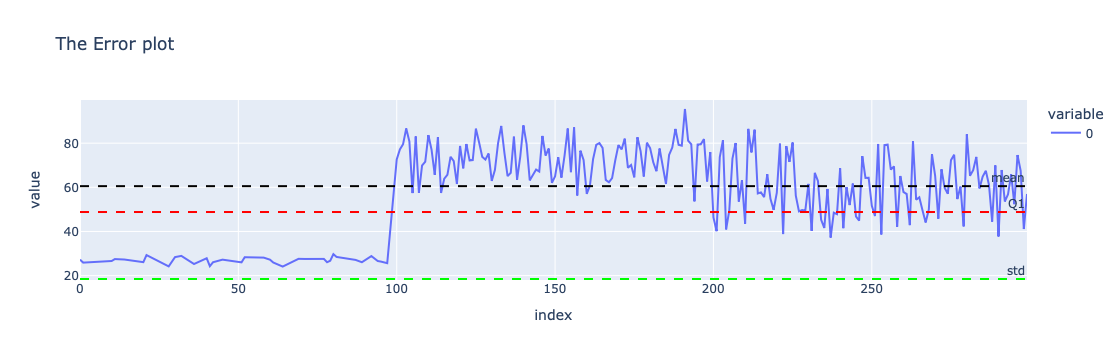

In [187]:
plotly_plot(errors_65)

#### Judging from the graph -> set threshold = 30

anomaly sample:Index([100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       ...
       290, 291, 292, 293, 294, 295, 296, 297, 298, 299],
      dtype='int64', length=200)


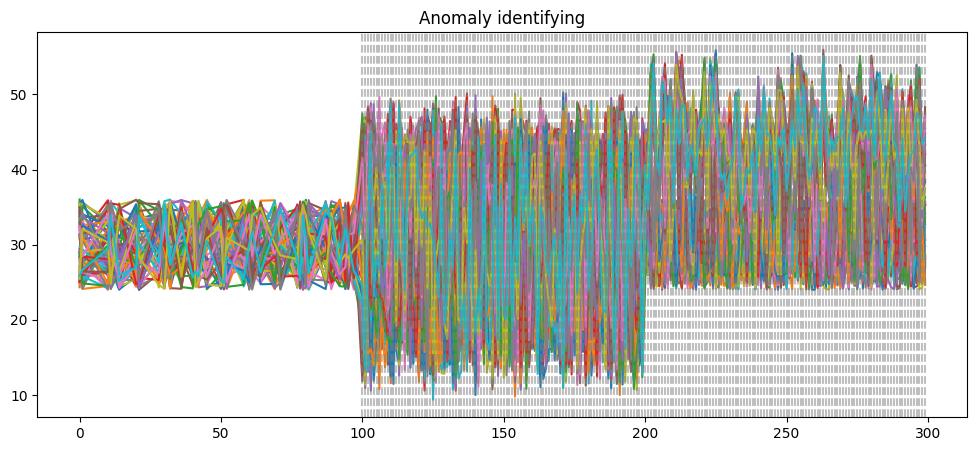

In [189]:
plot_anomalies(X_test_65.T, errors_65, 30)

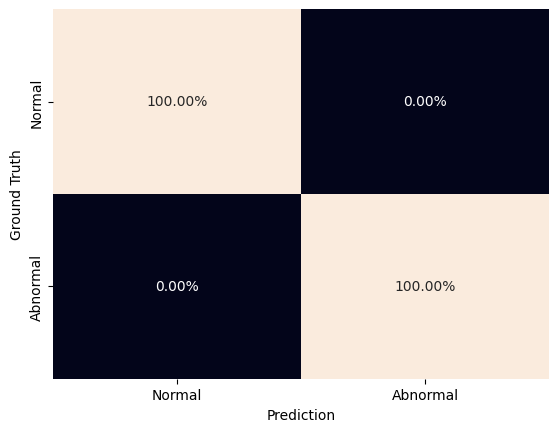

In [191]:
plot_confusion_mat(errors_65, 30, labels_65)

### USING SMOOTH DATA - LOW PASS FILTERING ABOVE

In [113]:
lf_X = low_filt_df[:100].sample(10, random_state=42)
lf_X_test = low_filt_df.drop(lf_X.index)
lf_X_test.shape, lf_X.shape

((290, 60), (10, 60))

In [114]:
lf_ica = FastICA(random_state=42, whiten_solver='eigh')
lf_ica.fit(lf_X.T)

/Users/GPalita/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.



FastICA(random_state=42, whiten_solver='eigh')

In [168]:
pd.DataFrame(lf_ica.components_)

0         1         2         3         4         5         6  \
0  0.140396  0.127597  0.183476 -0.178057 -0.117542  0.082610 -0.108290   
1  0.153501  0.247064  0.061969  0.204199 -0.108565 -0.226129  0.035252   
2  0.060971  0.094224  0.031786  0.138908 -0.032413  0.264964  0.148921   
3  0.010732  0.358504  0.072229 -0.211589  0.173424 -0.053165  0.245553   
4 -0.179457  0.083114 -0.395455 -0.036178 -0.063917  0.217102  0.051494   
5  0.059366 -0.014554 -0.087789 -0.067226 -0.153429  0.008700 -0.080770   
6 -0.132351  0.103185  0.071579 -0.120416 -0.180651 -0.028817  0.143347   
7  0.198433 -0.088449 -0.167615 -0.040839  0.139544 -0.043220 -0.033043   
8 -0.140493 -0.209694 -0.039218 -0.109772 -0.203665 -0.192298  0.276128   
9 -0.059435  0.183882 -0.030115  0.234392  0.049542 -0.036507 -0.147538   

          7         8         9  
0 -0.029010 -0.010648  0.233058  
1 -0.041140  0.073511  0.171210  
2  0.026970 -0.070116  0.028829  
3  0.045718 -0.105279 -0.069617  
4  0.115283  0.269259 -0.101850  
5  0.168204 -0.153894 -0.309556  
6 -0.341759 -0.221026 -0.009340  
7 -0.235686 -0.137064  0.041770  
8  0.233986  0.070939  0.177064  
9  0.012045 -0.291704  0.261274

In [115]:
lf_W = lf_ica.components_
lf_U = lf_W@ lf_X

lf_U_pinv = np.linalg.pinv(lf_U)
print(lf_W.shape, lf_U.shape, lf_U.T.shape, lf_U_pinv.shape )

lf_b_test = lf_X_test @ lf_U_pinv
print(lf_b_test.shape) 


(10, 10) (10, 60) (60, 10) (60, 10)
(290, 10)


In [116]:
lf_X_hat = np.dot(lf_b_test, lf_U)
lf_X_hat= pd.DataFrame(lf_X_hat, index= lf_X_test.index)

In [117]:
lf_errors = compute_euclidean_distance(lf_X_test, lf_X_hat)

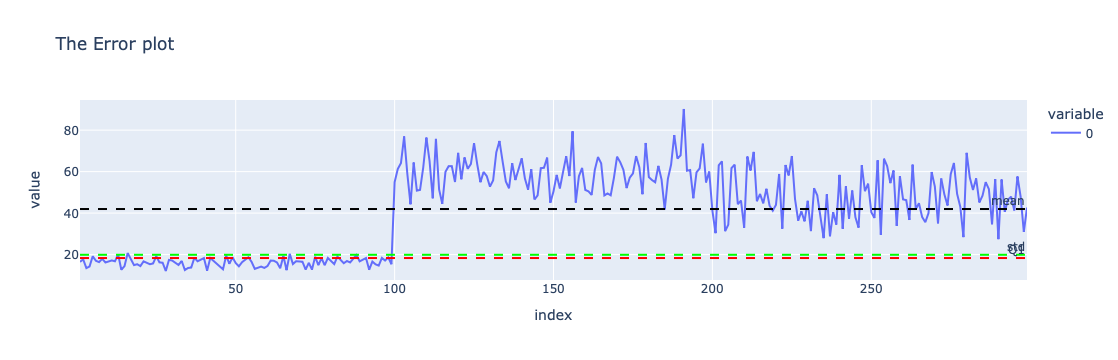

In [163]:
plotly_plot(lf_errors)

### From graph, set threshold = 20

anomaly sample:Index([ 13,  16,  67, 100, 101, 102, 103, 104, 105, 106,
       ...
       290, 291, 292, 293, 294, 295, 296, 297, 298, 299],
      dtype='int64', length=203)


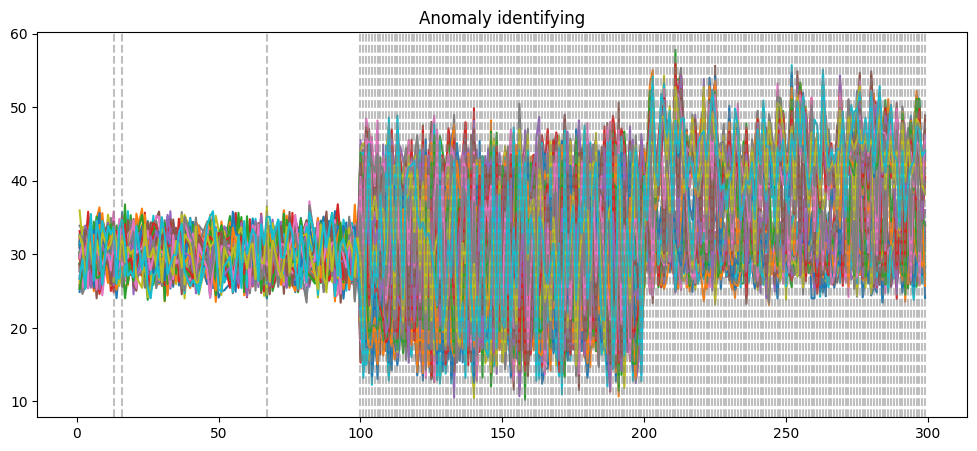

In [165]:
plot_anomalies(lf_X_test.T, lf_errors, 20)

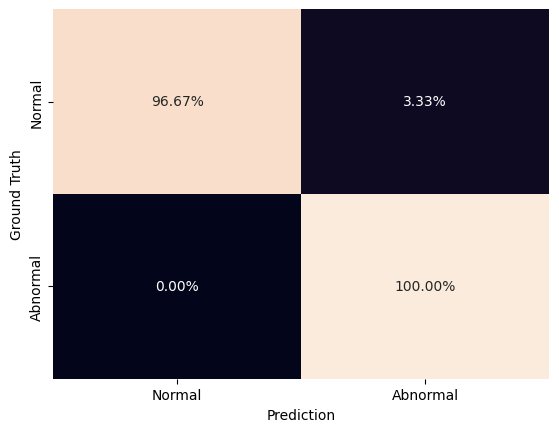

In [166]:
plot_confusion_mat(lf_errors, 20, labels=test_labels)